In [30]:
from skimage import io, exposure, img_as_float
import matplotlib.pyplot as plt
%matplotlib inline

## Denoising Image

In [31]:
img = io.imread('dataset/test4.png')

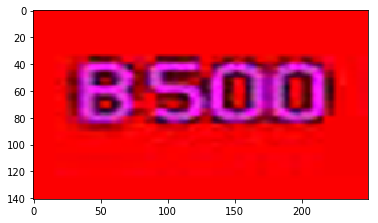

In [32]:
# img = img[400:700,100:300]
plt.imshow(img)

In [33]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

orig = img_as_float(img)
sigma_est = estimate_sigma(orig, multichannel=True, average_sigmas=True)
sigma_est

0.00049639026818279908

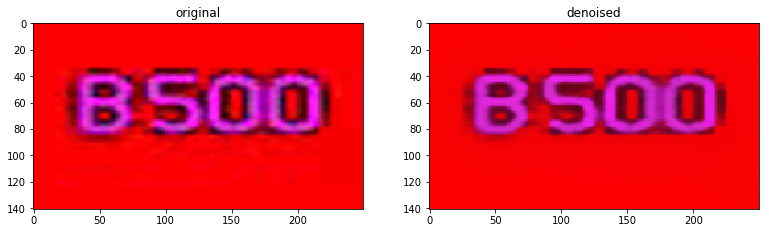

In [35]:
new = denoise_bilateral(orig, sigma_color=0.05, sigma_spatial=15,
                multichannel=True)

fig, ax = plt.subplots(1, 2, figsize=(13,10))
ax[0].imshow(orig)
ax[0].set_title('original')
ax[1].imshow(new)
ax[1].set_title('denoised')

fig.savefig('test4.jpg')